In [1]:
import numpy as np
import cv2
import torch
import json
import matplotlib.pyplot as plt

# Using YOLO/Detectron2 to segment

## Using Detectron2

In [2]:
!python3 -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone https://github.com/facebookresearch/detectron2.git
dist = distutils.core.run_setup("./detectron2/setup.py")
!python3 -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
# python -m pip install git+https://github.com/facebookresearch/detectron2.git

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import matplotlib.pyplot as plt

# import some common libraries
import pandas as pd
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

fatal: destination path 'detectron2' already exists and is not an empty directory.
Note: NumExpr detected 10 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/holmes/anaconda3/envs/test/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 0.05
findfont: score(FontEntry(fname='/Users/holmes/anaconda3/envs/test/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/holmes/anaconda3/envs/test/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf', name='cmsy10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable'))

/Users/holmes/anaconda3/envs/test/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3527.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


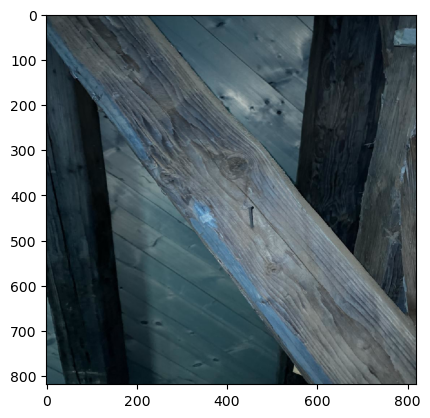

In [3]:
image_path = r"/Users/holmes/Documents/UNI-Bamberg/Arbeiten/Datensatz/Selfmade/3_iphone_domini_seg/Dominik-seg.v4i.coco-segmentation/test/Model_3_0037_jpeg.rf.7021068cda424cd59facf6d2f3399763.jpg"
image = cv2.imread(image_path)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# cv2.imshow("image", image)

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model

# Find a model from detectron2's model zoo.  https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md
trained_model_weights_path = "path_to_your_trained_model.pth"
cfg.MODEL.WEIGHTS = trained_model_weights_path

predictor = DefaultPredictor(cfg)
outputs = predictor(image)


# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()

# Read image and segmented area

In [4]:
# #! Rectangle
# image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_2_0070_jpeg.rf.f6b63d3d61757bb631819d5e228ffe1f.jpg")
# image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_2_0070_jpeg.rf.f6b63d3d61757bb631819d5e228ffe1f.jpg")


# with open("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_2_0070_jpeg.json") as f:
#     data = json.load(f)

! Quadrilateral

image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_14_0013_jpeg.rf.bab0f2a77774acd744a9c7b5b864a6b5.jpg")
image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_14_0013_jpeg.rf.bab0f2a77774acd744a9c7b5b864a6b5.jpg")

with open("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_14_0013_jpeg.json") as f:
    data = json.load(f)

# ! Not Quadrilateral

# image_org = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/Model_15_0039_jpeg.rf.72bd7617b1cc96535f7b49ab20867cda.jpg")
# image_seg = cv2.imread("/Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_15_0039_jpeg.rf.72bd7617b1cc96535f7b49ab20867cda.jpg")

# with open("//Users/holmes/Documents/UNI-Bamberg/4.Semester_MA/Masterthesis/xAI_Masterthesis_Pan/Code/Transformation/test_Model_15_0039_jpeg.json") as f:
#     data = json.load(f)

seg_output = data
class_map = {1: "other", 2: "main_beam"}

print(seg_output)


zsh:1: command not found: Quadrilateral
{'file_name': '/mnt/data/backup_pan/Dataset/Seg-dominik-iphone/Dominik-seg.v4i.coco-segmentation/valid/Model_14_0013_jpeg.rf.bab0f2a77774acd744a9c7b5b864a6b5.jpg', 'instances': [{'class': 2, 'box': [352.7164001464844, 13.114960670471191, 615.6570434570312, 1024.0], 'score': 0.9999535083770752, 'mask': [{'polygon': [[441, 889], [441, 891], [440, 892], [440, 895], [439, 896], [439, 898], [440, 899], [440, 902], [441, 903], [441, 905], [442, 905], [442, 902], [443, 901], [443, 893], [442, 892], [442, 889]]}, {'polygon': [[376, 14], [375, 15], [371, 15], [370, 16], [367, 16], [366, 17], [364, 17], [363, 18], [362, 18], [361, 19], [360, 19], [359, 20], [358, 20], [357, 21], [357, 23], [356, 24], [356, 27], [355, 28], [355, 53], [356, 54], [356, 69], [357, 70], [357, 73], [358, 74], [358, 75], [361, 78], [361, 79], [364, 82], [364, 83], [367, 86], [367, 87], [368, 88], [368, 89], [369, 90], [369, 91], [370, 92], [370, 93], [371, 94], [371, 96], [372, 9

# Select main area

## select max area

In [5]:
#FUNCTION: Select the mask with the largest area using Shoelace formula

def polygon_area(polygon):
    polygon = np.array(polygon)
    x = polygon[:, 0]
    y = polygon[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))
    
max_area = 0
max_area_index = -1

for i, instance in enumerate(seg_output['instances']):
    polygons = instance['mask']
    for j, polygon_data in enumerate(polygons):
        polygon = polygon_data['polygon']
        area = polygon_area(polygon)
        print(f"Mask_{i}_{j} area: {area}")
        if area > max_area:
            max_area = area
            max_area_index = f"Mask_{i}_{j}"
            max_polygon = polygon

print(f"Largest mask index: {max_area_index}, area: {max_area}")

largest_polygon = max_polygon
print(largest_polygon)

Mask_0_0 area: 39.0
Mask_0_1 area: 39588.5
Mask_1_0 area: 143041.5
Mask_2_0 area: 31715.0
Mask_3_0 area: 143334.0
Largest mask index: Mask_3_0, area: 143334.0
[[199, 2], [198, 3], [191, 3], [188, 6], [188, 7], [186, 9], [186, 10], [185, 11], [185, 13], [184, 14], [184, 15], [183, 16], [183, 18], [182, 19], [182, 22], [183, 23], [183, 38], [184, 39], [184, 56], [185, 57], [185, 60], [186, 61], [186, 63], [187, 64], [187, 66], [188, 67], [188, 69], [189, 70], [189, 71], [190, 72], [190, 73], [192, 75], [192, 76], [193, 77], [193, 78], [194, 79], [194, 81], [195, 82], [195, 83], [196, 84], [196, 87], [197, 88], [197, 91], [198, 92], [198, 97], [199, 98], [199, 103], [200, 104], [200, 108], [201, 109], [201, 113], [202, 114], [202, 117], [203, 118], [203, 121], [204, 122], [204, 124], [205, 125], [205, 127], [206, 128], [206, 129], [207, 130], [207, 132], [208, 133], [208, 134], [209, 135], [209, 136], [210, 137], [210, 139], [211, 140], [211, 141], [212, 142], [212, 144], [213, 145], [213

## Plot original polygon

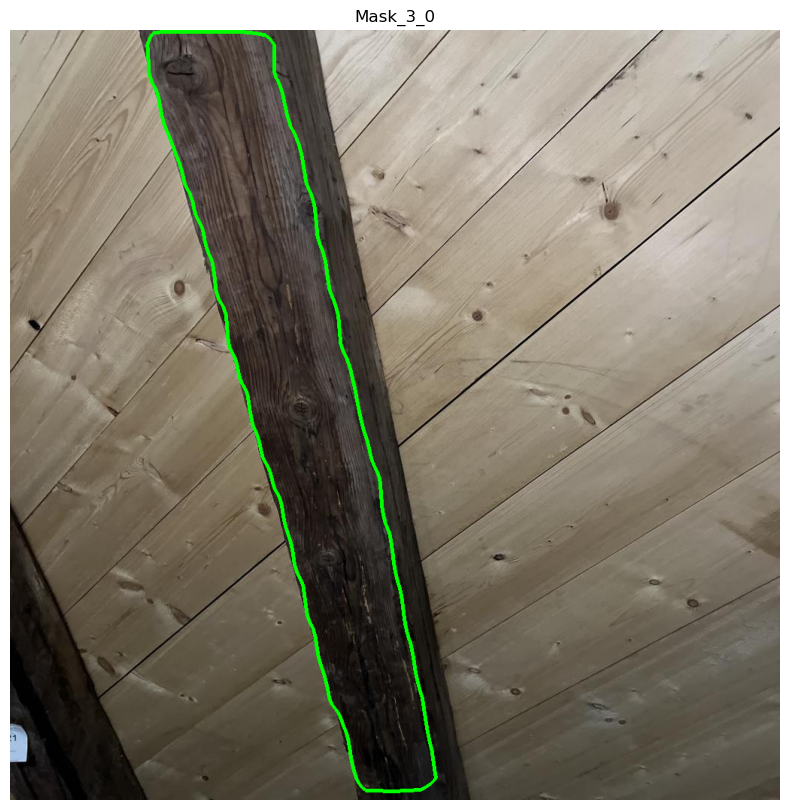

In [6]:
def draw_polygon_on_image(image, polygon):
    pts = np.array(polygon, np.int32)
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=3)
    return image

image_with_polygon = draw_polygon_on_image(image_org.copy(), largest_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_polygon, cv2.COLOR_BGR2RGB))
plt.title(max_area_index)
plt.axis('off')
plt.show()

# plt.imsave("image_with_largest_polygon.jpg", cv2.cvtColor(image_with_polygon, cv2.COLOR_BGR2RGB))


# Abstract complex polygon from the main area to simple polygon

In [7]:
def draw_simple_polygon(image, simplified_polygon):
    pts = np.array(simplified_polygon, np.int32)
    if pts.shape[-1] == 1:
        pts = pts.reshape((-1, 2))
    pts = pts.reshape((-1, 1, 2))
    cv2.polylines(image, [pts], isClosed=True, color=(255, 0, 0), thickness=3) 
    return image

## Simplify polygon using **Douglas-Peucker**

Simplified polygon using Douglas-Peucker algorithm:
[[[ 191    3]]

 [[ 185   60]]

 [[ 460  995]]

 [[ 546 1010]]

 [[ 566  992]]

 [[ 492  600]]

 [[ 351   19]]]


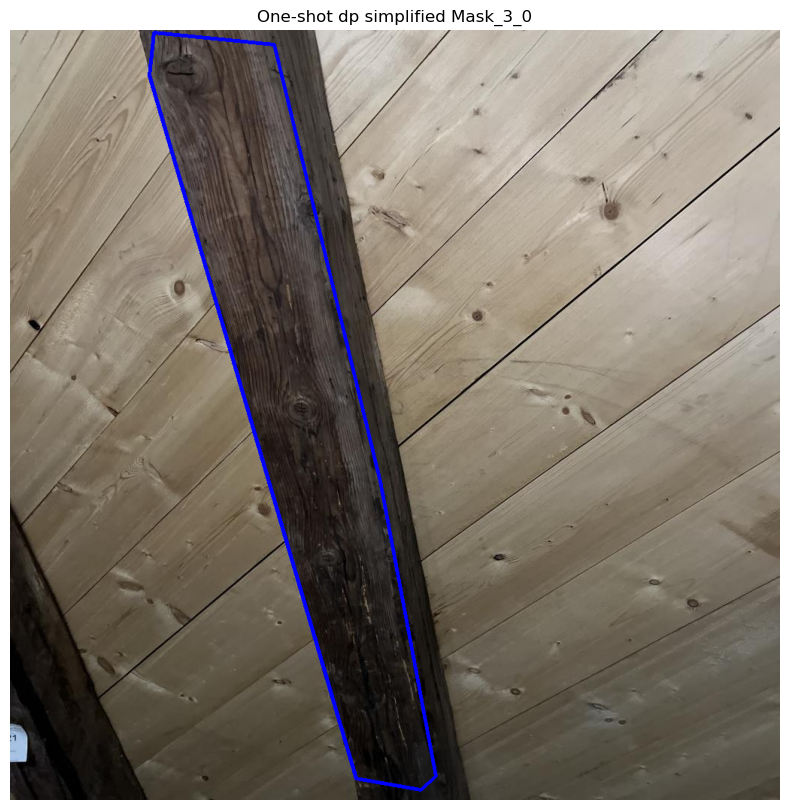

In [8]:
# FUNCTION: Simplify the polygon using Douglas-Peucker algorithm

def dp_simplify(polygon, epsilon_factor=0.006):
    contour = np.array(polygon, dtype=np.int32).reshape((-1, 1, 2))
    epsilon = epsilon_factor * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

dp_simplified_polygon = dp_simplify(largest_polygon)

print("Simplified polygon using Douglas-Peucker algorithm:")
print(dp_simplified_polygon)

image_with_dp_polygon = draw_simple_polygon(image_org.copy(), dp_simplified_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_dp_polygon, cv2.COLOR_BGR2RGB))
plt.title(f"One-shot dp simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_with_dp_polygon.jpg", cv2.cvtColor(image_with_dp_polygon, cv2.COLOR_BGR2RGB))



## Simplify polygon using **Visvalingam–Whyatt**

Simplified polygon using Visvalingam–Whyatt algorithm:
[[199.   2.]
 [198.   3.]
 [191.   3.]
 ...
 [322.   3.]
 [313.   3.]
 [312.   2.]]


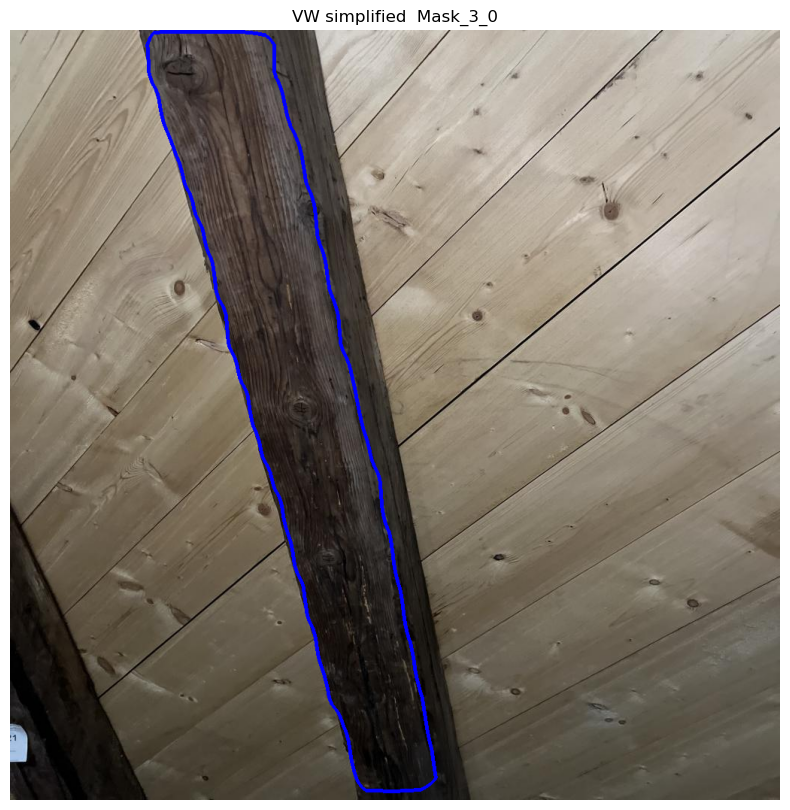

In [9]:
# FUNCTION: Simplified polygon using Visvalingam–Whyatt algorithm

def vw_simplify(polygon, threshold=0.5):
    def area_of_triangle(p1, p2, p3):
        return 0.5 * abs(p1[0] * (p2[1] - p3[1]) + p2[0] * (p3[1] - p1[1]) + p3[0] * (p1[1] - p2[1]))
    
    points = np.array(polygon, dtype=np.float32)
    is_removed = np.zeros(points.shape[0], dtype=bool)
    areas = np.array([area_of_triangle(points[i - 1], points[i], points[i + 1]) for i in range(1, len(points) - 1)])
    
    while len(areas) > 0 and np.min(areas) < threshold:
        min_index = np.argmin(areas) + 1
        is_removed[min_index] = True
        points = points[~is_removed]
        print(f"Removed point at index {min_index}, remaining points: {len(points)}")
        if len(points) < 3:
            break
        areas = np.array([area_of_triangle(points[i - 1], points[i], points[i + 1]) for i in range(1, len(points) - 1)])
        print(f"Recomputed areas: {areas}")
    return points

vw_simplified_polygon = vw_simplify(largest_polygon)

print("Simplified polygon using Visvalingam–Whyatt algorithm:")
print(vw_simplified_polygon)

image_with_vw_polygon = draw_simple_polygon(image_org.copy(), vw_simplified_polygon)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_vw_polygon, cv2.COLOR_BGR2RGB))
plt.title(f"VW simplified  {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_with_vw_polygon.jpg", cv2.cvtColor(image_with_vw_polygon, cv2.COLOR_BGR2RGB))


### Plot simplify polygon

## Simplify polygon using **convex_hull**

[[[ 312    2]]

 [[ 322    3]]

 [[ 329    4]]

 [[ 339    6]]

 [[ 343    9]]

 [[ 346   12]]

 [[ 349   16]]

 [[ 351   19]]

 [[ 404  230]]

 [[ 491  595]]

 [[ 492  600]]

 [[ 548  887]]

 [[ 561  958]]

 [[ 566  992]]

 [[ 566  994]]

 [[ 565  996]]

 [[ 558 1003]]

 [[ 552 1007]]

 [[ 546 1010]]

 [[ 536 1011]]

 [[ 518 1012]]

 [[ 496 1012]]

 [[ 473 1011]]

 [[ 470 1009]]

 [[ 466 1005]]

 [[ 463 1001]]

 [[ 460  995]]

 [[ 425  891]]

 [[ 424  888]]

 [[ 185   60]]

 [[ 184   56]]

 [[ 182   22]]

 [[ 182   19]]

 [[ 183   16]]

 [[ 185   11]]

 [[ 186    9]]

 [[ 188    6]]

 [[ 191    3]]

 [[ 199    2]]]


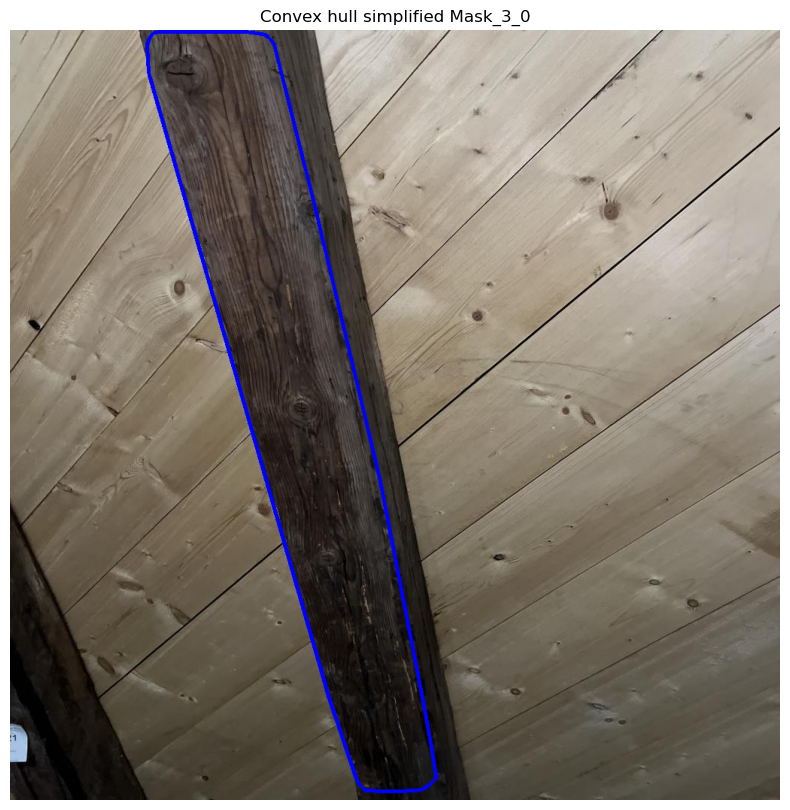

In [10]:
#FUNCTION: convex_hull

def ch_simplify(polygon):
    points = np.array(polygon, dtype=np.int32).reshape((-1, 1, 2))
    hull = cv2.convexHull(points)
    return hull

# simplified_polygon = ch_simplify(dp_simplified_polygon)
simplified_polygon = ch_simplify(vw_simplified_polygon)

print(simplified_polygon)

image_after_ch = draw_simple_polygon(image_org.copy(), simplified_polygon)

plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))
plt.title(f"Convex hull simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_after_ch.jpg", cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))



# Reshape the simple polygon to parallel pairs/correct perspective

## Find the outer quadrilateral of the polygon using Douglas-Peucker


Best outer quadrilateral: [[[ 191    3]]

 [[ 351   19]]

 [[ 546 1010]]

 [[ 460  995]]]


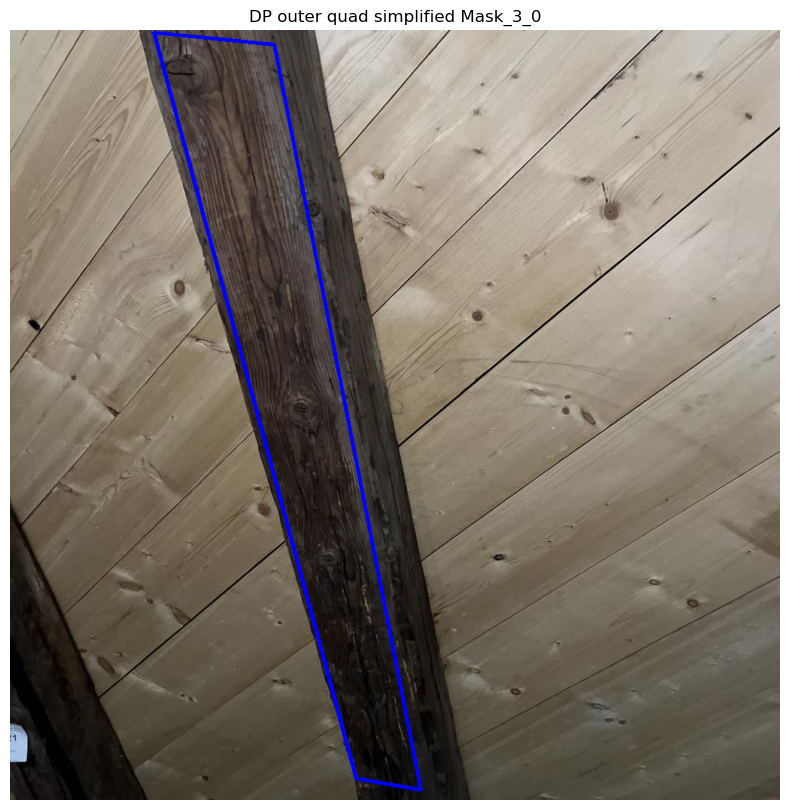

In [11]:
optimal_quad_pts = dp_simplify(simplified_polygon, epsilon_factor=0.03)

print("Best outer quadrilateral:", optimal_quad_pts)

optimal_quad_pts = ch_simplify(optimal_quad_pts)

image_outer_quad = draw_simple_polygon(image_org.copy(), optimal_quad_pts)


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_outer_quad, cv2.COLOR_BGR2RGB))
plt.title(f"DP outer quad simplified {max_area_index}")
plt.axis('off')
plt.show()

# plt.imsave("image_after_ch.jpg", cv2.cvtColor(image_after_ch, cv2.COLOR_BGR2RGB))

# Perspective correction

## centroid

centroid:  (375.1417501348305, 455.70349967823745)
rect:  [[320.54483    7.252199]
 [429.73865    7.252199]
 [429.73865  904.1548  ]
 [320.54483  904.1548  ]]


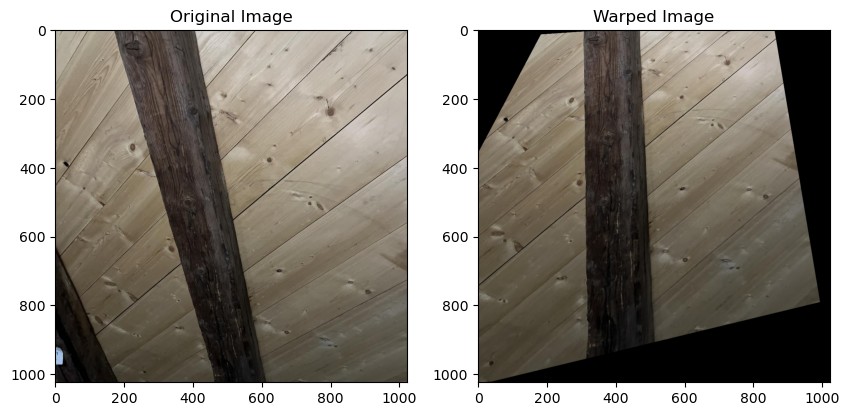

Saved warped image to warped_image.png


In [12]:
def preprocess_vertices(vertices):
    points = [(v[0][0], v[0][1]) for v in vertices]

    center = np.mean(points, axis=0)
    sorted_points = sorted(points, key=lambda p: (np.arctan2(p[1] - center[1], p[0] - center[0])))
    # print(sorted_points)
    return sorted_points

def polygon_centroid(vertices):
    n = len(vertices)
    if n < 3:
        raise ValueError("A polygon must have at least three vertices")
    
    A = 0
    for i in range(n):
        x0, y0 = vertices[i]
        x1, y1 = vertices[(i + 1) % n]
        A += x0 * y1 - x1 * y0
    A /= 2
    
    Cx = 0
    Cy = 0
    for i in range(n):
        x0, y0 = vertices[i]
        x1, y1 = vertices[(i + 1) % n]
        common_factor = (x0 * y1 - x1 * y0)
        Cx += (x0 + x1) * common_factor
        Cy += (y0 + y1) * common_factor
    Cx /= (6 * A)
    Cy /= (6 * A)
    
    return Cx, Cy

def distance(pt1, pt2):
    return np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)

def get_vertices_from_quad(vertices, centroid, image_shape):
    dists = [
        distance(vertices[0], vertices[1]),
        distance(vertices[1], vertices[2]),
        distance(vertices[2], vertices[3]),
        distance(vertices[3], vertices[0])
    ]

    avg_length = [dists[0] + dists[2], dists[1] + dists[3]]

    rect = np.array([
        [centroid[0] - avg_length[0] / 2, centroid[1] - avg_length[1] / 2],
        [centroid[0] + avg_length[0] / 2, centroid[1] - avg_length[1] / 2],
        [centroid[0] + avg_length[0] / 2, centroid[1] + avg_length[1] / 2],
        [centroid[0] - avg_length[0] / 2, centroid[1] + avg_length[1] / 2]
    ], dtype="float32")
    
        # Adjust rect to fit within image bounds
    width, height = image_shape[1], image_shape[0]
    scale_factor = 1.0
    while True:
        min_x = np.min(rect[:, 0])
        min_y = np.min(rect[:, 1])
        max_x = np.max(rect[:, 0])
        max_y = np.max(rect[:, 1])
        
        if min_x >= 0 and min_y >= 0 and max_x < width and max_y < height:
            break
        
        scale_factor *= 0.95
        rect = np.array([
            [centroid[0] - (avg_length[0] / 2) * scale_factor, centroid[1] - (avg_length[1] / 2) * scale_factor],
            [centroid[0] + (avg_length[0] / 2) * scale_factor, centroid[1] - (avg_length[1] / 2) * scale_factor],
            [centroid[0] + (avg_length[0] / 2) * scale_factor, centroid[1] + (avg_length[1] / 2) * scale_factor],
            [centroid[0] - (avg_length[0] / 2) * scale_factor, centroid[1] + (avg_length[1] / 2) * scale_factor]
        ], dtype="float32")
    
    return rect


vertices = preprocess_vertices(optimal_quad_pts)

centroid = polygon_centroid(vertices)
print(f'centroid: ', centroid)

rect = get_vertices_from_quad(vertices, centroid, image_shape=image_org.shape)
print(f'rect: ',rect)

M = cv2.getPerspectiveTransform(np.array(vertices, dtype="float32"), rect)

output_size = (image_org.shape[1], image_org.shape[0])
warped = cv2.warpPerspective(image_org, M, output_size)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image_org, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.title('Warped Image')
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.show()

output_filename = 'warped_image.png'
cv2.imwrite(output_filename, warped)
print(f'Saved warped image to {output_filename}')